In [90]:
# author: René Kopeinig
# script: Detrending and Dickey Fuller Test
# description: Applying Dickey Fuller test to check stationarity, adding rolling mean and detrending on given time series.

In [66]:
# Add IPython-specific directive to display plots directly below the notebook cell
%matplotlib inline

In [67]:
# Import dependencies
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [91]:
 '''
Why doing an Augmented Dickey Fuller Test and what does it mean?

Time series are stationary if they do not have trend or seasonal effects. 
Summary statistics calculated on the time series are consistent over time, 
like the mean or the variance of the observations. 
The Augmented Dickey-Fuller test is a type of statistical test called a unit root test.
The idea is to figure out how strongly a time series is defined by a trend.

Results:

Null Hypothesis (H0): If accepted, it suggests the time series has a unit root, meaning it is non-stationary. 
                      It has some time dependent structure.

Alternate Hypothesis (H1): The null hypothesis is rejected; it suggests the time series does not have a unit 
                           root, meaning it is stationary. It does not have time-dependent structure.


If p-value >  0.05 = Accept the null hypothesis
If p-value <= 0.05 = Reject the null hypothesis

Test Statistic > Critical value for 1% = Accept the null hypothesis
Test Statistic < Critical value for 1% = Reject the null hypothesis
'''

'\nWhy doing an Augmented Dickey Fuller Test and what does it mean?\n\nTime series are stationary if they do not have trend or seasonal effects. \nSummary statistics calculated on the time series are consistent over time, \nlike the mean or the variance of the observations. \nThe Augmented Dickey-Fuller test is a type of statistical test called a unit root test.\nThe idea is to figure out how strongly a time series is defined by a trend.\n\nResults:\n\nNull Hypothesis (H0): If accepted, it suggests the time series has a unit root, meaning it is non-stationary. \n                     It has some time dependent structure.\n\nAlternate Hypothesis (H1): The null hypothesis is rejected; it suggests the time series does not have a unit \n                          root, meaning it is stationary. It does not have time-dependent structure.\n\n\nIf p-value >  0.05 = Accept the null hypothesis\nIf p-value <= 0.05 = Reject the null hypothesis\n\nTest Statistic > Critical value for 1% = Accept the 

In [68]:
# Load LTC 
ltc = pd.read_csv('/home/rkopeinig/workspace/Time-Series-Analysis/data/ltc.csv')
ltc['date'] = pd.to_datetime(ltc['date'])
ltc = ltc.set_index('date')

# Load NEO 
neo = pd.read_csv('/home/rkopeinig/workspace/Time-Series-Analysis/data/neo.csv')
neo['date'] = pd.to_datetime(neo['date'])
neo = neo.set_index('date')

# Load XRP 
xrp = pd.read_csv('/home/rkopeinig/workspace/Time-Series-Analysis/data/xrp.csv')
xrp['date'] = pd.to_datetime(xrp['date'])
xrp = xrp.set_index('date')

In [82]:
def adfuller_test(series):
    log_series = series.apply(lambda x: np.log(x))
    log_series_diff=log_series-log_series.shift()
    log_series_diff.dropna(inplace=True)
    raw = adfuller(log_series_diff, autolag='AIC', regression='c')[:5]
    data = [v for v in raw[:4]]
    data.extend([raw[4]['1%'], raw[4]['5%'], raw[4]['10%']])
    return pd.DataFrame({'Value':data, 'Label': ['Test Statistics', 'p-value','#Lags used', 'Number of Observations Used', 'Critical value for 1%', 'Critical value for 5%', 'Critical value for 10%']})

def de_trender(series):
    log_series = series.apply(lambda x: np.log(x))
    log_series_diff = log_series - log_series.shift()
    return log_series_diff

def rolling_mean(series, window):
    return series.rolling(window).mean()

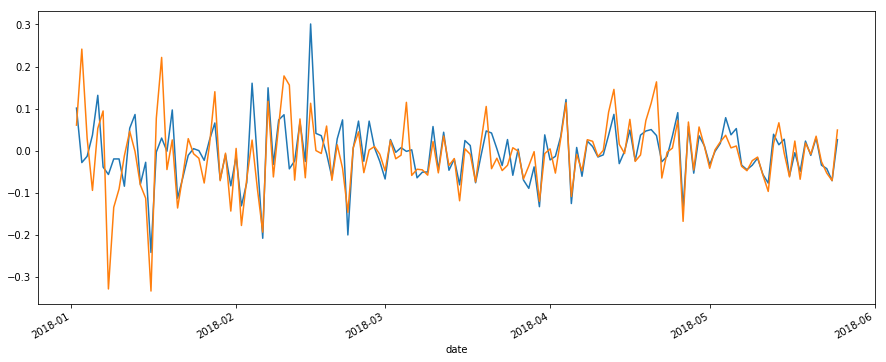

In [83]:
ltc_detrend = de_trender(ltc['price'])
xrp_detrend = de_trender(xrp['price'])


ltc_detrend.plot()
xrp_detrend.plot()

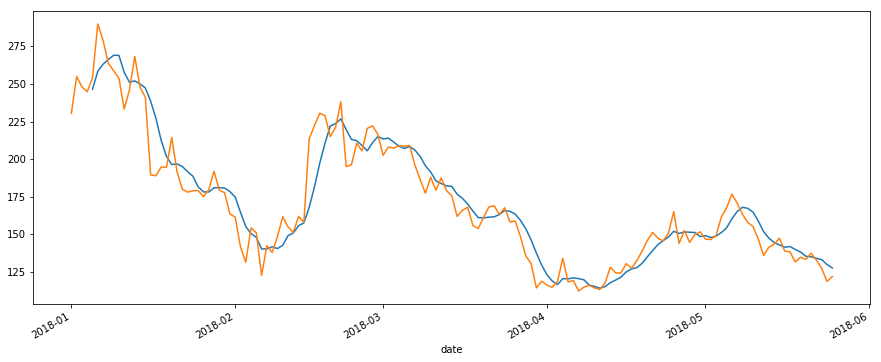

In [84]:
ltc=ltc['2018']
ltc_mean=rolling_mean(ltc['price'], 5)
ltc_mean.plot()
ltc['price'].plot()

In [85]:
adfuller_test(ltc['price'])

,Label,Value
0,Test Statistics,-1.332507e+01
1,p-value,6.345355e-25
2,#Lags used,0.000000e+00
3,Number of Observations Used,1.430000e+02
4,Critical value for 1%,-3.476927e+00
5,Critical value for 5%,-2.881973e+00
6,Critical value for 10%,-2.577665e+00


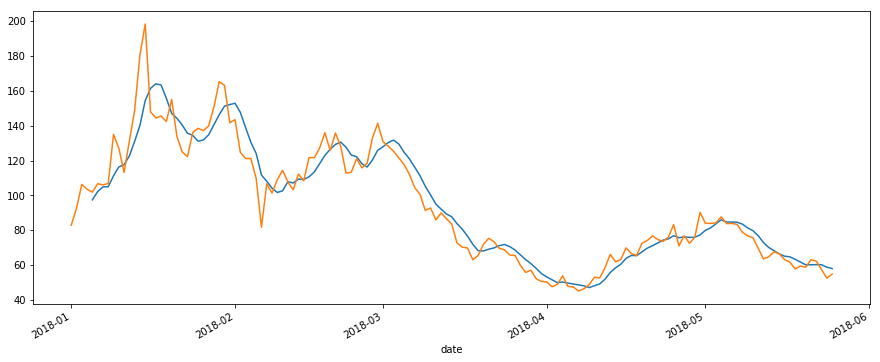

In [86]:
neo=neo['2018']
neo_mean=rolling_mean(neo['price'], 5)
neo_mean.plot()
neo['price'].plot()

In [87]:
adfuller_test(neo['price'])

,Label,Value
0,Test Statistics,-1.249743e+01
1,p-value,2.855521e-23
2,#Lags used,0.000000e+00
3,Number of Observations Used,1.430000e+02
4,Critical value for 1%,-3.476927e+00
5,Critical value for 5%,-2.881973e+00
6,Critical value for 10%,-2.577665e+00


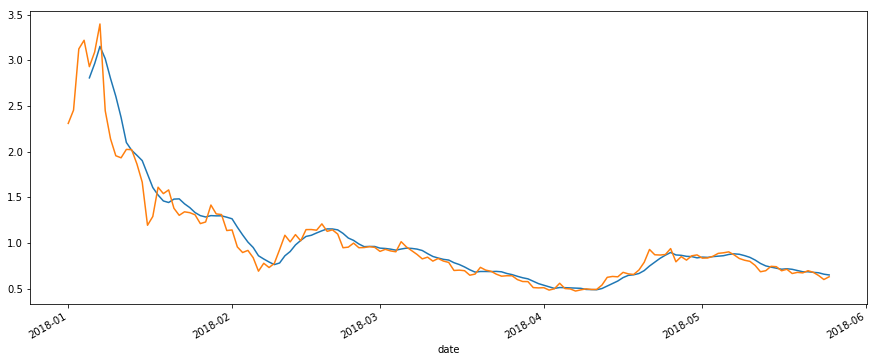

In [88]:
xrp=xrp['2018']
xrp_mean=rolling_mean(xrp['price'], 5)
xrp_mean.plot()
xrp['price'].plot()

In [89]:
adfuller_test(xrp['price'])

,Label,Value
0,Test Statistics,-1.134517e+01
1,p-value,1.031325e-20
2,#Lags used,0.000000e+00
3,Number of Observations Used,1.430000e+02
4,Critical value for 1%,-3.476927e+00
5,Critical value for 5%,-2.881973e+00
6,Critical value for 10%,-2.577665e+00
